In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
dataset=load_dataset('lukebarousse/data_jobs')

df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_DA=df[df['job_title_short']=='Data Analyst'].copy()

In [7]:
df_DA['job_posted_month_no']=df_DA['job_posted_date'].dt.month

#explode the job Skills
df_DA_exploded=df_DA.explode('job_skills')

df_DA_pivot=df_DA_exploded.pivot_table(index='job_posted_month_no', columns='job_skills',aggfunc='size',fill_value=0)

df_DA_pivot.loc['total']=df_DA_pivot.sum()
df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [14]:
df_DA_pivot=df_DA_pivot[df_DA_pivot.loc['total'].sort_values(ascending=False).index]
df_DA_pivot=df_DA_pivot.drop('total')

In [16]:
df_DA_pivot=df_DA_pivot.reset_index()

In [18]:
df_DA_pivot['job_posted_month']=df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot=df_DA_pivot.set_index('job_posted_month')
df_DA_pivot=df_DA_pivot.drop(columns='job_posted_month_no')

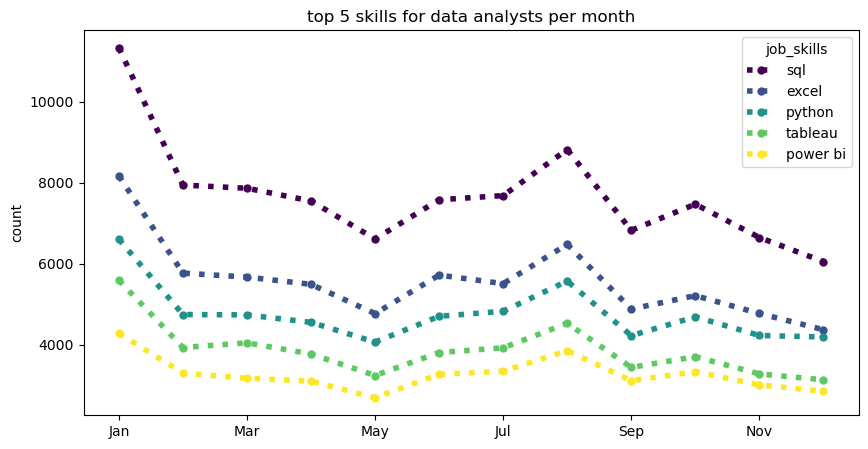

In [42]:
df_DA_pivot.loc[:,'sql':'power bi'].plot(
  kind='line',
  linewidth=4,
  linestyle=':',                #options:'-','--','-.',':'
  colormap='viridis',                     #use cheatsheet
  marker='o' ,                             # 'o','x','+','*','s', '+', ',' '1','2','3,',
  markersize=5,
  figsize=(10,5)

  
  )


plt.title('top 5 skills for data analysts per month')
plt.ylabel('count')
plt.xlabel('')
plt.show()


In [43]:
# customizing scatter plot

In [2]:
df_exploded=df_DA.explode('job_skills')


skill_stats=df_exploded.groupby('job_skills').agg(
  skill_count=('job_skills','count'),                      #here agg we want to perform and what agg we performed
  median_salary=('salary_year_avg','median')

)

skill_count=20

skill_stats=skill_stats.sort_values(by='skill_count',ascending=False).head(skill_count)

skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


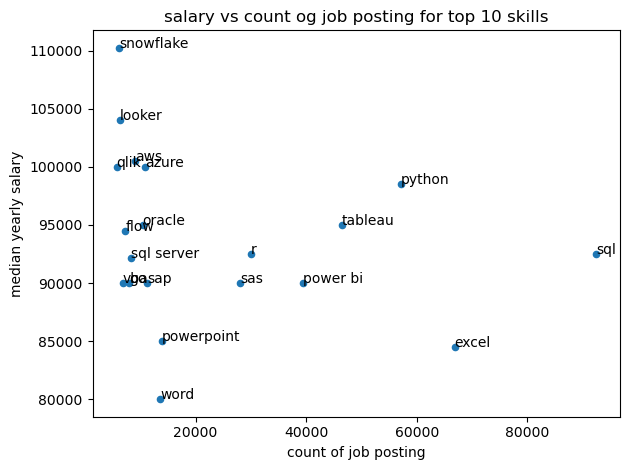

In [3]:
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.xlabel('count of job posting')
plt.ylabel('median yearly salary')
plt.title('salary vs count og job posting for top 10 skills')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
  # print(i, txt)
    plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt)

plt.show()    


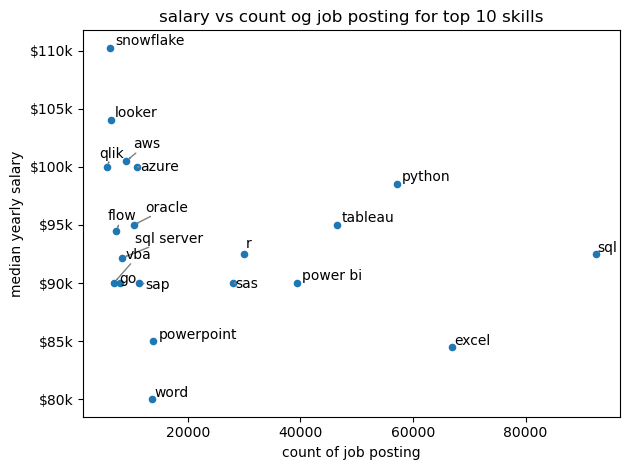

In [12]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')

texts=[]
for i, txt in enumerate(skill_stats.index):
  # print(i, txt)
   texts.append( plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->',color='gray',lw=1))
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}k'))
plt.xlabel('count of job posting')
plt.ylabel('median yearly salary')
plt.title('salary vs count og job posting for top 10 skills')
plt.tight_layout()

plt.show()    

